# Import

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import numpy as np
import math
import itertools 
import pandas as pd
import numpy as np
import io
import msoffcrypto
from sklearn.metrics import r2_score
import openpyxl
import plotly.express as px
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import plotly
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import streamlit as st
import json
from math import factorial as fact
from IPython.display import Markdown, display
import networkx as nx
import requests
import toml
import sys, os
import collections
from types import SimpleNamespace
import copy

%matplotlib inline 
%config Completer.use_jedi = False

from utils import *

# stat indiv by name 

In [2]:
file = 'VALEO_full.tmj'
algo = load_data_brut(file)

In [4]:
def Indiv_reverse(Name,algo):
    NameList = Name.split(',')
    Clist = algo.Clist
    CtoE = {}
    EtoP = {}
    for n in NameList:
        if n[0] == 'E':
            c = int(n[-1])
            e = int(n[1])
            CtoE[c] = e

        if n[0] == 'P':
            e = int(n[-1])
            p = int(n[1])
            EtoP[e] = p
            
    d = dict(sorted(CtoE.items()))
    Clist = list(d.keys())
    CtoE = list(d.values())
    d = dict(sorted(EtoP.items()))
    EtoP = list(d.values())
    indiv = indiv_create(algo, row = None, NewCtoE = CtoE, NewPtoE = EtoP)
    return indiv

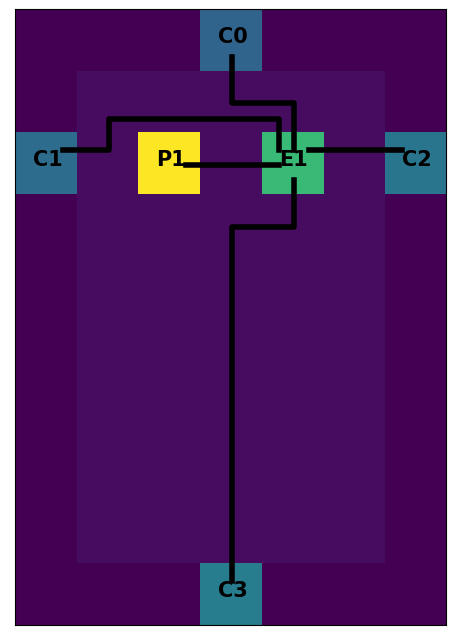

In [8]:
dfs = algo.dfslot
dfline = algo.dfline
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
IDSelects = []
List_EtoC = indiv['List_EtoC']
List_PtoE = indiv['List_PtoE']
for n in range(3):
    IDSelects+= ['{}{}'.format(Elems[n],i) for i in indiv[ElemsList[n]]]

dflineSelect = dfline[dfline.ID.isin(indiv["Name"])].copy()
dfsSelect    = dfs[dfs.ID.isin(IDSelects)].copy()
f = plot_(algo,dflineSelect, dfsSelect, '') 

In [139]:
df = pd.read_excel('test.xlsx', sheet_name= 'Sheet2', header=0).set_index('Case').T
df['Group Capteur'] = df['Group Capteur'].fillna('').str.split(' ')
df

Case,pompe,Strat,C0,C1,C2,C3,Group Capteur,No Group Capteur s,Pression debit C0,Pression debit C1,Pression debit C2,Pression debit C3,Debit total
1,1,Full_s,Ramp,Fixed,Fixed,Fixed,[],0 1 2 3,"[2.23, 36.31]","[4.48, 11.15]","[4.51, 11.19]","[4.51, 11.20]",69.85
2,1,full g,Ramp,Fixed,Fixed,Fixed,"[0, 1, 2, 3]",NaN,"[1.95, 33.94]","[4.14, 10.73]","[2.97, 9.08]","[4.18, 10.77]",64.52
3,1,gr E1,Ramp,Fixed,Fixed,Fixed,"[0, 2]",1 3,"[1.95, 33.94]","[4.48, 11.15]","[2.97, 9.08]","[4.51, 11.20]",65.37
4,3,Full_s,Ramp,Fixed,Fixed,Fixed,[],0 1 2 3,"[5.2, 55.49]","[11.01, 17.49]","[11.09, 17.55]","[11.10, 17.56]",108.09
5,3,full g,Ramp,Fixed,Fixed,Fixed,"[0, 1, 2, 3]",NaN,"[4.45, 51.34]","[10.02, 16.68]","[6.8, 13.74]","[10.11, 16.75]",98.51
6,3,gr E1,Ramp,Fixed,Fixed,Fixed,"[0, 2]",1 3,"[4.45, 51.34]","[11.01, 17.49]","[6.8, 13.74]","[11.10, 17.56]",100.13
7,1,gr E1,Ramp,Fixed,Ramp,Fixed,"[0, 2]",1 3,"[1.30, 27.78]","[4.48, 11.15]","[1.34, 28.19]","[4.51, 11.20]",78.32
8,3,gr E1,Ramp,Fixed,Ramp,Fixed,"[0, 2]",1 3,"[2.84, 41.04]","[11.01, 17.49]","[2.93, 41.63]","[11.10, 17.56]",117.72
9,1,gr E1,Fixed,Fixed,Ramp,Ramp,"[0, 2]",1 3,"[2.94, 9.04]","[4.48, 11.15]","[1.99, 34.31]","[2.30, 36.91]",91.41
10,3,gr E1,Fixed,Fixed,Ramp,Ramp,"[0, 2]",1 3,"[6.72, 13.67]","[11.01, 17.49]","[4.54, 51.87]","[5.36, 56.36]",139.39


In [25]:
Case = 3 #sheet2 ou sheet3
Names = ['E0-C1,E0-C3,E1-C0,E1-C2,P0-E0,P1-E1',
         'E1-C0,E1-C1,E1-C2,E1-C3,P1-E1']
Name = Names[Case-2]
df = pd.read_excel('test.xlsx', sheet_name= 'Sheet{}'.format(Case), header=0).set_index('Case').T
df['Group Capteur'] = df['Group Capteur'].fillna('').str.split(' ')
data = {}

for idx , row in df.iterrows():

    Group = row['Group Capteur']
    Group = [int(i)  for i in Group] if len(Group) > 1 else []
    
    Clist = algo.Clist
    Pompe = 'Pa' if row.pompe == 1 else 'Pc'
    algo.Pompes  = [Pompe] * len(algo.Comb['P'])
    algo.Pvals =  [algo.DataCategorie['Pompe']['Values'][Pompe][i] for i in ['a','b','c']]
    ID = "Case{}_Ptype{}_Strat{}".format(row.name, row.pompe, row.Strat)
    Nozzles = row[['C0','C1','C2','C3']].str.lower().tolist()
    algo.Nozzles = Nozzles
    Nvals   = [algo.DataCategorie['Nozzle']['Values'][n]['a'] for n in Nozzles]
    algo.Nvals = dict(zip(Clist, Nvals))
    
    algo.Group = Group    
    
    print(idx,Pompe,Nozzles, Group)
    
    indiv = Indiv_reverse(Name,algo)
    col = ['Pression debit C0','Pression debit C1','Pression debit C2','Pression debit C3']

    Pcalc , Dcalc = [] , []
    for c in col : 
        v = row[c].replace("[",'').replace("]",'').replace(" ",'').split(',')
        Pcalc.append(v[0])
        Dcalc.append(v[1])
        
    data[idx] = {
#         'ID' : ID ,
#         'Nozzles' : Nozzles,
        'PressionList' :  indiv['PressionList'],
        'Pcalc' : Pcalc,
        'DebitList' : indiv['DebitList'],
        'Dcalc' : Dcalc,
        'Debit' : indiv['Debit'],
        'debitc': row['Debit total'],
    }    

1 Pa ['ramp', 'fixed', 'fixed', 'fixed'] []
2 Pa ['ramp', 'fixed', 'fixed', 'fixed'] [0, 1, 2, 3]
3 Pa ['ramp', 'fixed', 'fixed', 'fixed'] [0, 2]
4 Pc ['ramp', 'fixed', 'fixed', 'fixed'] []
5 Pc ['ramp', 'fixed', 'fixed', 'fixed'] [0, 1, 2, 3]
6 Pc ['ramp', 'fixed', 'fixed', 'fixed'] [0, 2]
7 Pc ['ramp', 'fixed', 'fixed', 'fixed'] [1, 3]
8 Pa ['ramp', 'fixed', 'ramp', 'fixed'] [0, 2]
9 Pc ['ramp', 'fixed', 'ramp', 'fixed'] [0, 2]


In [24]:
Name
pd.DataFrame(data).T

'E0-C1,E0-C3,E1-C0,E1-C2,P0-E0,P1-E1'

,PressionList,Pcalc,DebitList,Dcalc,Debit,debitc
1,"[2.23, 4.48, 4.51, 4.51]","[2.23, 4.48, 4.51, 4.51]","[36.25, 11.15, 11.19, 11.2]","[36.31, 11.15, 11.19, 11.20]",69.8,69.85
2,"[1.95, 4.14, 2.97, 4.18]","[1.95, 4.14, 2.97, 4.18]","[33.89, 10.73, 9.09, 10.77]","[33.94, 10.73, 9.08, 10.77]",64.5,64.52
3,"[1.95, 4.48, 2.97, 4.51]","[1.95, 4.48, 2.97, 4.51]","[33.89, 11.15, 9.09, 11.2]","[33.94, 11.15, 9.08, 11.20]",65.3,65.37
4,"[5.22, 11.01, 11.09, 11.1]","[5.2, 11.01, 11.09, 11.10]","[55.4, 17.49, 17.55, 17.56]","[55.49, 17.49, 17.55, 17.56]",108.0,108.09
5,"[4.47, 10.02, 6.8, 10.11]","[4.45, 10.02, 6.8, 10.11]","[51.27, 16.68, 13.75, 16.75]","[51.34, 16.68, 13.74, 16.75]",98.4,98.51
6,"[4.47, 11.01, 6.8, 11.1]","[4.45, 11.01, 6.8, 11.10]","[51.27, 17.49, 13.75, 17.56]","[51.34, 17.49, 13.74, 17.56]",100.1,100.13
7,"[1.31, 4.48, 1.35, 4.51]","[1.30, 4.48, 1.34, 4.51]","[27.76, 11.15, 28.16, 11.2]","[27.78, 11.15, 28.19, 11.20]",78.3,78.32
8,"[2.86, 11.01, 2.94, 11.1]","[2.84, 11.01, 2.93, 11.10]","[41.0, 17.49, 41.6, 17.56]","[41.04, 17.49, 41.63, 17.56]",117.6,117.72
9,"[2.95, 4.48, 2.0, 2.31]","[2.94, 4.48, 1.99, 2.30]","[9.05, 11.15, 34.26, 36.85]","[9.04, 11.15, 34.31, 36.91]",91.3,91.41
10,"[6.73, 11.01, 4.56, 5.38]","[6.72, 11.01, 4.54, 5.36]","[13.68, 17.49, 51.79, 56.27]","[13.67, 17.49, 51.87, 56.36]",139.2,139.39


In [26]:
Name
pd.DataFrame(data).T

'E1-C0,E1-C1,E1-C2,E1-C3,P1-E1'

,PressionList,Pcalc,DebitList,Dcalc,Debit,debitc
1,"[2.23, 4.48, 4.51, 4.46]","[2.23, 4.48, 4.51, 4.46]","[36.25, 11.16, 11.19, 11.13]","[36.31, 11.16, 11.19, 11.13]",69.7,69.79
2,"[1.47, 2.22, 2.24, 2.21]","[1.46, 2.22, 2.23, 2.21]","[29.39, 7.86, 7.88, 7.83]","[29.43, 7.85, 7.88, 7.83]",53.0,52.99
3,"[1.95, 4.48, 2.97, 4.46]","[1.95, 4.48, 2.973, 4.46]","[33.89, 11.16, 9.09, 11.13]","[33.94, 11.16, 9.08, 11.13]",65.3,65.31
4,"[5.22, 11.02, 11.09, 10.96]","[5.20, 11.02, 11.09, 10.96]","[55.4, 17.5, 17.55, 17.45]","[55.49, 17.50, 17.55, 17.45]",107.9,107.99
5,"[3.24, 4.91, 4.94, 4.88]","[3.23, 4.9, 4.93, 4.87]","[43.67, 11.68, 11.71, 11.64]","[43.73, 11.670, 11.70, 11.63]",78.7,78.73
6,"[4.47, 11.02, 6.8, 10.96]","[4.45, 11.02, 6.8, 10.96]","[51.27, 17.5, 13.75, 17.45]","[51.34, 17.50, 13.74, 17.45]",100.0,100.03
7,"[5.22, 9.99, 11.09, 9.93]","[5.20, 9.99, 11.09, 9.93]","[55.4, 16.66, 17.55, 16.61]","[55.49, 16.66, 17.55, 16.61]",106.2,106.31
8,"[1.31, 4.48, 1.35, 4.46]","[1.30, 4.48, 1.34, 4.46]","[27.76, 11.16, 28.16, 11.13]","[27.78, 11.16, 28.19, 11.13]",78.2,78.26
9,"[2.86, 11.02, 2.94, 10.96]","[2.84, 11.02, 2.93, 10.96]","[41.0, 17.5, 41.6, 17.45]","[41.04, 17.50, 41.63, 17.45]",117.6,117.62


# TEST

In [92]:
file = 'VALEO_full.tmj'
select= ['E2','C0']
algo = load_data_brut(file, select)
df = indiv_init(algo, 50).sort_values(algo.fitness).reset_index(drop = True)

In [93]:
df.iloc[0]

Clist                                                   [1, 2, 3]
CtoE                                                    [1, 1, 0]
Econnect                                      {0: [3], 1: [1, 2]}
Elist                                                      [0, 1]
Ecount                                                          2
EtoP                                                       [0, 1]
Pconnect                                         {0: [0], 1: [1]}
Plist                                                      [0, 1]
Pcount                                                          2
List_EtoC                               [[E0-C3], [E1-C1, E1-C2]]
List_PtoE                                      [[P0-E0], [P1-E1]]
dist_Connect    {'E0-C3': 0.64, 'E1-C1': 1.44, 'E1-C2': 0.48, ...
dist                                                          3.2
Name                          [E0-C3, E1-C1, E1-C2, P0-E0, P1-E1]
ID                                                             23
Name_txt  

In [105]:
indiv = algo.indivs[3]
indiv

{'Clist': [1, 2, 3],
 'CtoE': array([0, 0, 0], dtype=int64),
 'Econnect': {0: [1, 2, 3]},
 'Elist': [0],
 'Ecount': 1,
 'EtoP': array([0], dtype=int64),
 'Pconnect': {0: [0]},
 'Plist': [0],
 'Pcount': 1,
 'List_EtoC': [['E0-C1', 'E0-C2', 'E0-C3']],
 'List_PtoE': [['P0-E0']],
 'dist_Connect': {'E0-C1': 2.0, 'E0-C2': 2.64, 'E0-C3': 0.64, 'P0-E0': 0.16},
 'dist': 5.44,
 'Name': ['E0-C1', 'E0-C2', 'E0-C3', 'P0-E0'],
 'ID': 4,
 'Name_txt': 'E0-C1,E0-C2,E0-C3,P0-E0',
 'Epoch': 0,
 'Pression_s': [4.5, 4.5, 4.5],
 'Debit_s': [11.2, 11.1, 11.2],
 'SumDebit_s': 33.5,
 'Pression_g': [3.7, 3.7, 3.8],
 'Debit_g': [10.2, 10.2, 10.3],
 'SumDebit_g': 30.7,
 'Masse': 1316,
 'Cout': 51,
 'Vg': True,
 'Vp': True,
 'Vnp': True,
 'Alive': True}

In [52]:
Groups = [1,3]
Econnect = indiv['Econnect']

Cond = False
for i, (e,EClist) in enumerate(Econnect.items()):
    Cond+= np.isin(Groups,  EClist).all()
indiv['Group'] = Cond


True

In [84]:
np.isin([],  [1,2]).all()

True

In [ ]:
L = []


In [108]:


Group = [1,2]
D = algo.Comb    
Clist = D['C']
Econnect = indiv['Econnect']
Pconnect = indiv['Pconnect']
EtoP = indiv['EtoP']
Pression = []
Debit = []
# Data = {}
Pression_C = []
# on loop sur chaque EV pour connect to C et faire calcul Pt Qt coté pompe et Pi Qi coté Capteur
Cpression = {}
grouped = False
for i, (e,EClist) in enumerate(Econnect.items()):
    p = EtoP[i]
    name = 'P{}-E{}'.format(p,e)
    VerifGroup = np.isin(Groups,  EClist)
    EClistTotal = [EClist]
    if VerifGroup.all() & (len(Group) > 0):
        EClistTotal = [Group, [i for i in EClist if i not in Group]]          
        grouped = True
    for i,  EClist in enumerate(EClistTotal):
        if i >0 : grouped = False
        d_EtoC_list = np.array([algo.dist['E{}-C{}'.format(e,c)] for c in EClist])
        print(EClistTotal)
        d_PtoE = algo.dist['P{}-E{}'.format(p,e)]
        res = debit(algo, d_EtoC_list,d_PtoE, EClist, grouped)
        # Data[name] = res        
        # Pression = Pression + list(res['Pi'])
        Debit = Debit + list(res['Qi'])
        Pi = list(res['Pi'])
        PressionConnect = dict(zip(EClist, Pi))
        Cpression.update(PressionConnect)
        # print(dc,dp,Clist,list(res['Pi']))
        Pression_C = Pression_C + [PressionConnect]
        PressionConnect
Cpression = [Cpression[i] for i in D['C']]
SumDebit = round(sum(Debit),1)
# keys = ['info','Data','Pression','Debit','SumDebit']
# vals = [info, Data,Pression, Debit, SumDebit] 

keys = ['Pression','Debit','SumDebit']
vals = [Cpression, Debit, SumDebit] 
dict(zip(keys,vals))

[[1, 2], [3]]


{1: 4.1, 2: 4.1}

[[1, 2], [3]]


{3: 4.5}

{'Pression': [4.1, 4.1, 4.5], 'Debit': [10.7, 10.7, 11.2], 'SumDebit': 32.6}

In [76]:
[i  for i in EClist if i not in Group]

[3]

In [49]:
np.isin([0,1], [[0,1,2],[3]])

C:\Users\bertrand\anaconda3\envs\base2\lib\site-packages\numpy\lib\arraysetops.py:587: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar2 = np.asarray(ar2).ravel()


array([False, False])

In [ ]:
g = [0,1]
for e


In [14]:
algo.DataCategorie

{'Pompe': {'Unique': ['Pa', 'Pc'],
  'Values': {'Pa': {'Categorie': 'Pompe',
    'Composants': 'Pompe 1',
    'Type': 'Single',
    'Masse': 136.0,
    'Cout': 2.5,
    'Actif': 1.0,
    'a': -0.000516,
    'b': -0.0154,
    'c': 4.87},
   'Pc': {'Categorie': 'Pompe',
    'Composants': 'Pompe 3',
    'Type': 'Brushless',
    'Masse': 330.0,
    'Cout': 24.0,
    'Actif': 1.0,
    'a': -0.000661,
    'b': -0.0286,
    'c': 12.1}}},
 'EV': {'Unique': ['Ea'],
  'Values': {'Ea': {'Categorie': 'EV',
    'Composants': 'EV_A',
    'Type': 'Electrovanne',
    'Masse': 110.0,
    'Cout': 6.0,
    'Actif': 1.0,
    'a': 0.00764}}},
 'Tuyau': {'Unique': ['Ta'],
  'Values': {'Ta': {'Categorie': 'Tuyau',
    'Composants': 'Tuyau 1',
    'Type': '4 mm',
    'Masse': 46.0,
    'Cout': 0.35,
    'Actif': 1.0,
    'a': 0.000235}}},
 'Reservoir': {'Unique': ['Ra'],
  'Values': {'Ra': {'Categorie': 'Reservoir',
    'Composants': '1 Réservoir',
    'Masse': 600.0,
    'Cout': 25.0,
    'Actif': 1.0,
    '

In [ ]:
enumerate

In [12]:
for Categorie , v in algo.DataCategorie.items():
    v['Values'].keys()


dict_keys(['Pa', 'Pc'])

dict_keys(['Ea'])

dict_keys(['Ta'])

dict_keys(['Ra'])

dict_keys(['Na', 'Nb'])

In [3]:
indiv = indiv_create(algo)  
indiv

Pompe
Tuyau
EV


{'D': {'C': [0, 1, 2, 3], 'E': [0, 1, 2], 'P': [0, 1]},
 'Clist': [0, 1, 2, 3],
 'CtoE': array([0, 0, 1, 0], dtype=int64),
 'Econnect': {0: [0, 1, 3], 1: [2]},
 'Elist': [0, 1],
 'Ecount': 2,
 'EtoP': array([0, 0], dtype=int64),
 'Pconnect': {0: [0, 1]},
 'Plist': [0],
 'Pcount': 1,
 'List_EtoC': [['E0-C0', 'E0-C1', 'E0-C3'], ['E1-C2']],
 'List_PtoE': [['P0-E0', 'P0-E1']],
 'dist_Connect': {'E0-C0': 2.24,
  'E0-C1': 2.0,
  'E0-C3': 0.64,
  'E1-C2': 0.48,
  'P0-E0': 0.16,
  'P0-E1': 2.24},
 'dist': 7.76,
 'Name': ['E0-C0', 'E0-C1', 'E0-C3', 'E1-C2', 'P0-E0', 'P0-E1'],
 'ID': 1,
 'Name_txt': 'E0-C0,E0-C1,E0-C3,E1-C2,P0-E0,P0-E1',
 'Epoch': 0,
 'Pression_s': [{0: 4.5, 1: 4.5, 3: 2.3}, {2: 4.5}],
 'Debit_s': [11.1, 11.2, 36.9, 11.1],
 'SumDebit_s': 70.3,
 'Pression_g': [{0: 2.7, 1: 2.7, 3: 1.8}, {2: 4.5}],
 'Debit_g': [8.6, 8.6, 32.4, 11.1],
 'SumDebit_g': 60.7,
 'Masse': 2328,
 'Cout': 109}

# formule 

In [ ]:
def debit(Dict_dist, group = True):
    d_EtoC = Dict_dist['EtoC']
    d_PtoE = Dict_dist['PtoE']
    p  = [-5.16e-04, -1.54e-02, 4.87]
    coef_E  = 7.64e-04
    coef_C  = 0.036
    coef_d  = 2.35e-04    
    
    A = coef_E + d_EtoC * coef_d + coef_C 
    Z =( A**-0.5).sum() if group else A**-0.5
    As , Bs, Cs = p[0] - (coef_d * d_PtoE) - 1/(Z**2), p[1] , p[2]
    delta = (Bs**2) - (4 * As * Cs)
    Qt  = np.array((- Bs - delta**0.5)/(2*As))
    Pt = np.array(Qt**2 / Z**2)
    a0 = p[0] * (Qt**2) + p[1] * Qt + p[2] - Pt
    Qi = (Pt / A)**0.5
    Pi = coef_C * (Qi**2)
    key = ['Qt','Pt','Qi','Pi']
    val = [Qt, Pt, Qi, Pi]
    val = [v.round(1) for v in val]
    return dict(zip(key,val))

In [ ]:
def Calcul_All(row, group):
    Econnect = row.Econnect
    Pconnect = row.Pconnect
    Pression = []
    Debit = []
    Data = {}
    for i, (e,Clist) in enumerate(Econnect.items()):
        p = row.EtoP[i]
        name = 'P{}-E{}'.format(p,e)
        dc = np.array([algo.dist['E{}-C{}'.format(e,c)] for c in Clist])
        dp = algo.dist['P{}-E{}'.format(p,e)]
        info = [i,e,Clist, p, dc, dp]
        Dict_dist = {'EtoC': dc,'PtoE':dp }
        res = debit(Dict_dist, group)
        Data[name] = res
        Pression = Pression + list(res['Pi'])
        Debit = Debit+ list(res['Qi'])
    SumDebit = round(sum(Debit),1)
    keys = ['info','Data','Pression','Debit','SumDebit']
    vals = [info, Data,Pression, Debit, SumDebit] 
    return dict(zip(keys,vals))

In [ ]:
file = 'VALEO_full.tmj'
algo = load_data_brut(file)
df1 = indiv_init(algo, 200)

In [ ]:
%%time
for idx,row  in df1.iterrows():
    rowCopy = copy.deepcopy(row)
    d = Calcul_All(rowCopy, False)
    col = ['Pression', 'Debit','SumDebit']
    col2 = ['Pression_s', 'Debit_s','SumDebit_s']
    df1.loc[idx, col2] = [str(d[c]) for c in col]
    d = Calcul_All(rowCopy, True)
    col = ['Pression', 'Debit','SumDebit']
    df1.loc[idx, col] = [str(d[c]) for c in col]

#     df1.loc[idx, 'Pression'] = str(d['Pression'])
#     df1['Debit'] = str(d['Debit'])
#     df1['SumDebit'] = str(d['SumDebit'])

In [ ]:
df1.drop(columns= ['Clist','D','Name', 'Name_txt','dist_Connect','List_EtoC','List_PtoE'])

algo.dist

In [ ]:
row = df1.iloc[4]
Calcul_All(row)

In [ ]:
row = df1.iloc[3]
Calcul_All(row)

In [ ]:
dc = np.array([144,48,240])/100
dp = 48/100
Dict_dist = {'EtoC': dc,'PtoE':dp }
debit(Dict_dist, group = True)
debit(Dict_dist, group = False)

In [ ]:
dc = np.array([0.64])
dp = 0.16
Dict_dist = {'EtoC': dc,'PtoE':dp }
debit(Dict_dist, group = True)
debit(Dict_dist, group = False)

## detail

In [ ]:
Ac = dc * coeffd
Ac

In [ ]:
A = []
Z = []
for i in range(3):
    a = coeffEV + dc[i]*coeffd + coeffC 
    A.append(a)

A = np.array(A)
'coeffC + dc[i]*coeffd + coeffC ',A
# A = A**-0.5
# 'A**-0.5',A
Z =( A**-0.5).sum()
Z = A[0]**-0.5
Z

In [ ]:
As = p[0] - coeffd*dp - 1/(Z**2)
Bs = p[1]
Cs = p[2]
As, Bs, Cs 

In [ ]:
delta = Bs**2 - 4 * As * Cs
Q  = (-Bs - delta**0.5)/(2*As)
Pt = Q**2 / Z**2

In [ ]:
delta , Q, Pt

In [ ]:
p[0] * Q**2 + p[1] * Q + p[2] - Pt

In [ ]:
Qi = (Pt / A)**0.5
Qi

In [ ]:
Qi = (Pt / A[0])**0.5
Qi

In [ ]:
Pi = coeffC*Qi**2
Pi

# RUN 

## Crossover & mutation 

In [ ]:
algo = load_data_brut(file)

In [ ]:
file = 'VALEO_full.tmj'
algo = load_data_brut(file)
df1 = indiv_init(algo, 5)
df1 = df1.drop_duplicates(subset='Name_txt')
df1 = df1.sort_values('dist').reset_index(drop = True)

In [ ]:
row = df1.iloc[2]
row

In [ ]:
l = []
l[0]

In [ ]:
NewCtoE = copy.deepcopy(row.CtoE)
len(NewCtoE)
idx = np.random.randint(len(NewCtoE))
NewCtoE
idx, NewCtoE[idx]
D = algo.Comb
D
l = [e for e in D['E'] if e != NewCtoE[idx]]
l
e = np.random.choice(l,1)[0]
e
NewCtoE[idx] = e
NewCtoE
indiv = indiv_create(algo, row,NewCtoE)

In [ ]:
row.CtoE
row.EtoP
indiv['CtoE']
indiv['EtoP']

In [ ]:
idx, CtoE[idx]
D = algo.Comb
l = [e for e in D['E'] if e != CtoE[idx]]
e = np.random.choice(l,1)[0]
NewCtoE = [e for e in D['E'] if e != CtoE[idx]]

In [ ]:
algo.df

In [ ]:
df1 = algo.df
df1 = df1.sort_values(algo.fitness).reset_index(drop = True)

In [ ]:
crossover = algo.crossover
df1.shape[0]
idxmax = int(df1.shape[0]*0.5)
idxmax
if idxmax == 1 : print("error crossover trop faible")
List = df1[:idxmax].index.values
List
Nmax = int(idxmax)
for n in range(Nmax):
    i1 , i2 = List[n*2] , List[n*2 + 1]

In [ ]:
int(0.9)

In [ ]:
df1.shape

In [ ]:
indiv_create(algo)

## Reprise Debit calcul

In [ ]:
file = 'VALEO_full.tmj'
algo = load_data_brut(file)
df1 = indiv_init(algo, 10)

In [ ]:
indiv = algo.indivs[0]
indiv

In [ ]:
Clist

In [ ]:
Econnect

In [ ]:
Dict_dist

In [ ]:
Econnect[0]

In [ ]:
algo.dist['E{}-C{}'.format(e,c)]

In [ ]:
Econnect = indiv['Econnect']
Pconnect = indiv['Pconnect']
EtoP = indiv['EtoP']
group = False
Pression = []
Debit = []
Data = {}
for i, (e,Clist) in enumerate(Econnect.items()):
    p = EtoP[i]
    name = 'P{}-E{}'.format(p,e)
    dc = np.array([algo.dist['E{}-C{}'.format(e,c)] for c in Clist])
    dp = algo.dist['P{}-E{}'.format(p,e)]
    info = [i,e,Clist, p, dc, dp]
    print('[i,e,Clist, p, dc, dp]' , info)
    Dict_dist = {'EtoC': dc,'PtoE':dp }
    res = debit(Dict_dist, group)
    Data[name] = res
    Pression = Pression + list(res['Pi'])
    Debit = Debit + list(res['Qi'])
SumDebit = round(sum(Debit),1)
keys = ['info','Data','Pression','Debit','SumDebit']
vals = [info, Data,Pression, Debit, SumDebit] 
vals

In [ ]:
confs = pd.read_excel('data.xlsx')
confs

In [ ]:
confs = algo.confs

## Masse cout

In [ ]:
file = 'VALEO_full.tmj'
algo = load_data_brut(file)
df = indiv_init(algo, 200)
df = df.drop_duplicates(subset='Name_txt')
df = df.sort_values('dist').reset_index(drop = True)

In [ ]:
indiv = df.iloc[3].to_dict()
indiv

In [ ]:
calcul_Masse_cout(indiv, algo)

In [ ]:
for Var_name in indiv.keys():
    string = Var_name
    globals()[string] = indiv[Var_name]

In [ ]:
dmasse = {}
dcout = {}
confs = algo.confs

masse, cout = confs[confs.Name == algo.Pompe][['Masse','Cout']].values[0]
masse, cout 
dmasse['Pmasse'] = Ecount*masse
dcout['Pcout'] = Ecount*cout

masse, cout = confs[confs.Name == algo.Tuyau][['Masse','Cout']].values[0]
masse, cout
dmasse['Tmasse'] = dist*masse
dcout['Tcout'] = dist*cout


Ccount = len(algo.Comb['C'])
masse, cout = confs[confs.Name == algo.EV][['Masse','Cout']].values[0]
masse, cout
dmasse['Emasse'] = Ccount*masse
dcout['Ecout'] = Ccount*cout

dmasse['Reservoir'] = 600
dcout['Reservoir'] = 30

dmasse
dcout

Poid = sum(dmasse.values())
Cout = sum(dcout.values())

In [ ]:
Ccount = len(algo.Comb['C'])

## Save

In [ ]:
df1 = algo.df
dfs = algo.dfslot
dfline = algo.dfline

In [ ]:
row = df1.iloc[0]
List_EtoC = row.List_EtoC
List_PtoE
List_EtoC
Econnect = row.Econnect

In [ ]:
[['E{}-C{}'.format(start, end) for end in List] for start , List in Econnect.items()]

In [ ]:
for l in List_EtoC:
    for EtoC in l :
        print(EtoC)
        dist = dfline.loc[dfline.ID.isin(l), 'dist'].values*2
        print(dist)

In [ ]:
Name = list(itertools.chain.from_iterable(List_EtoC + List_PtoE))

In [ ]:
(dfline.loc[dfline.ID.isin(Name), ['ID','dist']].set_index('ID').dist*2).to_dict()

In [ ]:
[['E{}-C{}'.format(start, end) for end in List] for start , List in Econnect.items()]

In [ ]:
dfline[['dist','ID']].to_clipboard()

In [ ]:
df1.drop(columns= ['D','Name', 'Name_txt']).to_clipboard()

In [ ]:
dfs
dfline
df1.drop(columns= ['D','Name', 'Name_txt'])

In [ ]:
DropList = ['C0','E2']
'|'.join(DropList)

In [ ]:
dfline[~dfline.ID.str.contains('|'.join(DropList))]

dfs[~dfs.ID.isin(DropList)]

In [ ]:
pd.DataFrame(algo.Comb)

In [ ]:
indiv_init(algo, 10)

In [ ]:
SimpleNamespace(**l)

In [ ]:
for l in df.values.tolist():
    col = ['D', 'CtoE','Econnect','Elist','Ecount', 'EtoP','Pconnect','Plist','Pcount', 'List_EtoC','List_PtoC', 'dist', 'Name']

In [ ]:
indivs = []

In [ ]:
dfline.sort_values('ID').reset_index(drop = True)
dfslot

## reproduction

In [ ]:
file = 'VALEO_full.tmj'
algo = load_data_brut(file)

In [ ]:
algo.dfline

In [ ]:
file = 'VALEO_full.tmj'
algo = load_data_brut(file)
df1 = indiv_init(algo, 10)
Col_drop = ['Name', 'Name_txt','dist_Connect','List_EtoC','List_PtoE']
# Col_drop = ['D','Name', 'Name_txt']
df1 = df1.drop(columns= Col_drop)

L = []      
List = df1[:7].index.values
# np.random.shuffle(List)
print(List)
df1

In [ ]:
L = [] 
algo.Nindiv = df1.shape[0]
for n in range(3):    
    i1 , i2 = List[n*2] , List[n*2 + 1]
    print(n,i1,i2)
    dfx = df1.loc[[i1,i2]].copy()
    L2 = Reprodution(dfx, algo)
    if L2 is not None :  
        L += L2
#         algo.repro +=1
# col = ['Clist', 'CtoE','Econnect','Elist','Ecount', 'EtoP','Pconnect','Plist','Pcount', 'ID_CtoE','ID_EtoP','dist','ID','Parent']
dfx = pd.DataFrame(L)[df1.columns.tolist() + ['parent']]
# df1s = df1[df1.ID.isin(parents)]
pd.concat([df1, dfx])

# df1['Name'] = (df1.ID_CtoE + df1.ID_EtoP).str.join(',')
# df1 = df1.drop_duplicates(subset='Name').sort_values('dist').reset_index(drop = True)    
# session_state['df1'] = df1
# session_state['Epoch'] = Epoch

In [ ]:
 np.random.randint(0,3,2)

# Test combinatoire sequencage 

In [ ]:
%%time
data, dfs, dfline , df1 = load_data_brut(500)
df1.shape

In [ ]:
df1

In [ ]:
index = 0
row = df1.loc[index]

D = dfs.Class.value_counts().to_dict()
Clist = list(range(D['C']))
CtoE = row.CtoE
Econnect = row.Econnect
ID_CtoE = ['C{}-E{}'.format(i, CtoE[i]) for i in Clist]
#     ID_CtoE

d = collections.defaultdict(list)
for i in Clist:
    c = CtoE[i]
    d[c].append(i)
d.items()

In [ ]:
N = 4
a = np.zeros(N, dtype= int)
a = np.array([0,0,1,0])
a
a==0
g1 = np.max(a)+1
g1
idx = np.random.randint(N)
idx
idx = 2
np.random.randint(g1)

In [ ]:
x1 = np.array([True,False])
x2 = np.array([True,True])
True & x1 & x2

In [ ]:
x1 = np.array([0, 0, 0, 1])
(x1 == 1).sum()!=1

In [ ]:
N = 3

a = np.array(list(itertools.product(range(N), repeat= N+1)))
a.shape
m = (a==0).sum(1)
# m
m2 = True
for i in range(1,N):
    print(i)
    m2 =  
m2
np.vstack([a.T,m2]).T

In [ ]:
N = 3

a0 = np.array(list(itertools.product(range(N), repeat= N+1)))


# m = (a==0).sum(1)
# m
m2 = False
M = []
for i in range(1,N):
#     print(i)
    m2 = m2 | (a0==i).sum(1) == 1
    M.append(m2)
# m2
M.append(~m2)
# m = (m == 2|3)
# m = (m == N)
a = a0[~m2]
a0.shape , a.shape
a

In [ ]:
Liste = [a0.T] + M
np.vstack(Liste).T

In [ ]:
Ecomb = a[1]
Ecomb
collections.Counter(Ecomb)

In [ ]:
dict(collections.Counter(Ecomb))

In [ ]:
d = collections.defaultdict(list)
for n,i in enumerate(Ecomb):
    d[i].append(n)
dict(d.items())

In [ ]:
np.where((arr==0)|(arr==1), arr^1, arr)

In [ ]:
L = []
for idx , row in df1.iterrows():
    index = 0
    row = df1.loc[index]

    D = dfs.Class.value_counts().to_dict()
    Clist = list(range(D['C']))
    CtoE = row.CtoE
    Econnect = row.Econnect
    ID_CtoE = ['C{}-E{}'.format(i, CtoE[i]) for i in Clist]
#     ID_CtoE
    
    d = collections.defaultdict(list)
    for i in Clist:
        c = CtoE[i]
        d[c].append(i)
#     d.items()

    for k,v in d.items(): 
#         print(k,v)
        for i in range(len(v)):
            l2 = list(itertools.combinations(v, i+1))
            L.append(row.tolist() + [l2])
    break
            
#             print(l2)

In [ ]:
df1.columns.tolist() + ['Ecomb']

In [ ]:
pd.DataFrame(L, columns= df1.columns.tolist() + ['Ecomb'])

In [ ]:
index = 0
row = df1.loc[index]
row

D = dfs.Class.value_counts().to_dict()
Clist = list(range(D['C']))
CtoE = row.CtoE
Econnect = row.Econnect
ID_CtoE = ['C{}-E{}'.format(i, CtoE[i]) for i in Clist]
ID_CtoE

In [ ]:
d = collections.defaultdict(list)
for i in Clist:
    c = CtoE[i]
    d[c].append(i)
d.items()

for k,v in d.items(): 
    print(k,v)
    for i in range(len(v)):
        l2 = list(itertools.combinations(v, i+1))
        print(l2)

In [ ]:
list(itertools.product(([0,1]), repeat=2))

In [ ]:
d = {}
for i in Clist:
    c = CtoE[i]
    d[c].append(i)
d.items()

In [ ]:
l = list(zip(row.CtoE, row.Clist))
d = collections.defaultdict(list)
for k, v in l:
    d[k].append(v)
d.items()

In [ ]:
D = dfs.Class.value_counts().to_dict()
Clist = list(range(D['C']))
CtoE = row.CtoE
Econnect = row.Econnect
ID_CtoE = ['C{}-E{}'.format(i, CtoE[i]) for i in Clist]
ID_CtoE

In [ ]:
index = 0
row = df1.loc[index]

# print(row)
# st._legacy_dataframe(row.to_frame().T)
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
IDSelects = []
ID_CtoE = row.ID_CtoE
ID_EtoP = row.ID_EtoP
for n in range(3):
    IDSelects+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]

dflineSelect = dfline[dfline.ID.isin(ID_CtoE + ID_EtoP)].copy()
dfsSelect = dfs[dfs.ID.isin(IDSelects)].copy()

In [ ]:
fig = plot_(data,dflineSelect, dfsSelect)

In [ ]:
fig = plot_(data,dfline, dfs)

# Tiled import

## func

In [ ]:
data, dfs, dfline , df1 = load_data_brut(10)

In [ ]:

df1

In [ ]:
dfx.

In [ ]:
row1

In [ ]:
df1.sample(10)

In [ ]:
ListSelectbox = df1.index
index = ListSelectbox[0]
row = df1.loc[index]
row

ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
IDSelects = []
ID_CtoE = row.ID_CtoE
ID_EtoP = row.ID_EtoP
for n in range(3):
    IDSelects+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]

dflineSelect = dfline[dfline.ID.isin(ID_CtoE + ID_EtoP)].copy()
dfsSelect = dfs[dfs.ID.isin(IDSelects)].copy()

In [ ]:
row.to_clipboard()

In [ ]:
dflineSelect

In [ ]:
dflineSelect.drop(columns= ['long', 'polyline']).to_clipboard()

In [ ]:
dfsSelect.to_clipboard()

In [ ]:
fig = plot_(data,dflineSelect, dfsSelect)

## Algo gen 

In [ ]:
def Reprodution(dfx,dfs):
    c1, c2 = copy.deepcopy(dfx.CtoE.values)
    
    if (c1 != c2).any():        
        m = c1 != c2
        index = np.where(m)[0]
        
        if len(index) > 1:    
            idx = np.random.choice(index)
        elif len(index) ==1:
            idx = index            
#         print(i1,i2,c1, c2,m, idx)    
        c1[idx] , c2[idx] = c2[idx] , c1[idx]
        NewCtoE = c1 , c2
#         print(NewCtoE)
        L = []

        for i in range(2):
            row = dfx.iloc[i]
#             print(row.to_list())
            l = indiv_verif(row,NewCtoE[i],dfs) 
#             print(l) 
            L.append(l)
        return L

In [ ]:
def indiv_verif(row,NewCtoE,dfs): 
    D = dfs.Class.value_counts().to_dict()
    Clist = list(range(D['C']))
    
    CtoE = NewCtoE
    Econnect = dict(collections.Counter(CtoE))
    Elist = sorted(Econnect)
    Ecount = len(Elist)   
    
    if Ecount > row.Ecount:
        x = row.EtoP
        y = np.random.randint(0,D['P'],Ecount - row.Ecount)
        EtoP = np.append(x, y)
    elif Ecount < row.Ecount:
        EtoP = np.random.choice(row.EtoP,row.Ecount - Ecount)
        print(EtoP)
    else : 
        EtoP = row.EtoP

    Pconnect = dict(collections.Counter(EtoP))
    Plist = sorted(Pconnect)
    Pcount = len(Plist)    

    ID_CtoE = ['C-E{}{}'.format(i, CtoE[i]) for i in Clist]
    ID_EtoP = ['E-P{}{}'.format(Elist[i]  , EtoP[i]) for i in range(Ecount)]

    dist = dfline.loc[dfline.ID.isin(ID_CtoE + ID_EtoP), 'dist'].sum()  
    l = [Clist, CtoE,Econnect,Elist,Ecount, EtoP,Pconnect,Plist,Pcount, ID_CtoE,ID_EtoP,dist]
    return l 


In [ ]:
data, dfs, dfline , df1 = load_data_brut(7)
df1['Epoch'] = df1.index
Epoch = df1.index.max()+1
df1

In [ ]:
L = []
List = df1[:7].index.values
np.random.shuffle(List)
print(List)
for n in range(3):
    print(n)
    i1 = List[n*2]
    i2 = List[n*2 + 1]
    dfx = df1.loc[[i1,i2]].copy()
    L2 = Reprodution(dfx, dfs)
    if L2:
        for l in L2:
            l.append(Epoch)
            l.append(dfx.Epoch.tolist())
            Epoch+= 1
            L.append(l)
#     print(n,Epoch, L2)
#             print(l, n)

In [ ]:
col = ['Clist', 'CtoE','Econnect','Elist','Ecount', 'EtoP','Pconnect','Plist','Pcount', 'ID_CtoE','ID_EtoP','dist','Epoch','Parents']
dfx = pd.DataFrame(L, columns= col)
# dfx
df1 = df1.append(dfx)
df1['Name'] = (df1.ID_CtoE + df1.ID_EtoP).str.join(',')
df1 = df1.drop_duplicates(subset='Name').sort_values('dist').reset_index(drop = True)

In [ ]:
df1

## Data

In [ ]:
with open('VALEO_1.tmj', 'r') as f:
  data = json.load(f)

In [ ]:
dfs = pd.DataFrame(data['layers'][1]['objects']).drop(columns= ['rotation','width','height','visible','gid']).rename(columns = {'class' : 'Class', 'name' : 'Name'})
dfs.x = (dfs.x/16).astype(int)
dfs.y = (dfs.y/16).astype(int) - 1
dfs.Name = pd.to_numeric(dfs.Name)
dfs['ID'] = dfs.Class + dfs.Name.astype(str)
dfs['Color'] = dfs['Class'].map({'C':10,'E':20,'P':30})

dfs

In [ ]:
dfline  = pd.DataFrame(data['layers'][2]['objects']).drop(columns=['rotation','width','name','height','visible']).rename(columns = {'class' : 'Class'})

for idx, row in dfline.iterrows():
    properties = row.properties
    dfline.loc[idx, ['end','long','start']] = [d['value'] for d in properties]    
    polyline = row.polyline
    x = row.x
    y = row.y
    polyline = [(p['x'] + x, p['y'] + y) for p in polyline]
    p = np.array(polyline)
    dfline.at[idx , 'polyline'] = p   
    dfline.loc[idx ,'dist'] = np.abs(np.diff(p.T)).sum()
dfline.start = pd.to_numeric(dfline.start)
dfline.end = pd.to_numeric(dfline.end)
dfline.dist = dfline.dist.astype(int)
dfline = dfline.drop(columns= ['properties','x','y'])
dfline['ID'] = dfline.Class + dfline.start.astype(str) + dfline.end.astype(str)
dfline

## plot all

In [ ]:
N = data['height']
A0 = data['layers'][0]['data']
A0 = np.array(A0).reshape(10,7)
pas = 16
unique = np.unique(A0)
A0[A0 == unique[0]] = 0
A0[A0 == unique[1]] = 1
A0

In [ ]:
for idx, row in dfs.iterrows():
#     print(row.x, row.y , row.Type * int(row.name))
    A0[row.y, row.x] = row.Type + int(row.Name)

In [ ]:
fig, ax = plt.subplots()
ax.imshow(A0)

In [ ]:
A = np.kron(A0, np.ones((16,16), dtype=int))
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(A)
for idx, row in dfline.iterrows():
    p = np.array(row.polyline)
    f = ax.plot(p[:,0],p[:,1],'k')
style = dict(size=10, color='black')  
for idx, row in dfs.iterrows():
    x = row.x*16
    y = row.y*16
    text = row.Class + str(row.Name)
    f = ax.text(row.x*16+8, row.y*16+8,text , **style,  ha='center', weight='bold') 

## indiv

## Objectif
269ms value count VS 9 ms collection & np bincount

In [ ]:
D = dfs.Class.value_counts().to_dict()
D

In [ ]:
%%time
L = []
D = dfs.Class.value_counts().to_dict()

for n in range(1000): 
    Clist = list(range(D['C']))

    CtoE = np.random.randint(0,D['E'],D['C'])
    Econnect = collections.Counter(CtoE)
    Elist = sorted(Econnect)
    Ecount = len(Elist)

    EtoP = np.random.randint(0,D['P'],Ecount)
    Pconnect = collections.Counter(EtoP)
    Plist = sorted(Pconnect)
    Pcount = len(Plist)

    ID_CtoE = ['C-E{}{}'.format(i, CtoE[i]) for i in Clist]
    ID_EtoP = ['E-P{}{}'.format(Elist[i]  , EtoP[i]) for i in range(Ecount)]

    dist = dfline.loc[dfline.ID.isin(ID_CtoE + ID_EtoP), 'dist'].sum()

    l = [Clist, CtoE,Econnect,Elist,Ecount, EtoP,Pconnect,Plist,Pcount, ID_CtoE,ID_EtoP,dist]
    L.append(l)  

In [ ]:
col = ['Clist', 'CtoE','Econnect','Elist','Ecount', 'EtoP','Pconnect','Plist','Pcount', 'ID_CtoE','ID_EtoP','dist']
df = pd.DataFrame(L, columns= col)
df.sort_values('dist').head(10)

In [ ]:
df['Name'] = (df.ID_CtoE + df.ID_EtoP).str.join(',')
df1 = df.drop_duplicates(subset='Name').sort_values('dist')

In [ ]:
df1

In [ ]:
ListSelectbox = df1[['ID_CtoE', 'ID_EtoP','dist']].values

In [ ]:
df1

In [ ]:
ListSelectbox = df1.index
index = ListSelectbox[0]
row = df1.loc[index]
row

Select = ListSelectbox[0]
Select
name = ','.join(Select[0]+Select[1])

row = df1[df1.Name == name].iloc[0]
row

row = df.iloc[3]
row

In [ ]:
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
IDSelects = []
ID_CtoE = row.ID_CtoE
ID_EtoP = row.ID_EtoP
for n in range(3):
    IDSelects+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]

dflineSelect = dfline[dfline.ID.isin(ID_CtoE + ID_EtoP)].copy()
dfsSelect = dfs[dfs.ID.isin(IDSelects)].copy()

In [ ]:
dflineSelect

In [ ]:
dfsSelect

## plot

In [ ]:
def plot_(data,dflineSelect, dfsSelect): 
    N = data['height']
    A0 = data['layers'][0]['data']
    A0 = np.array(A0).reshape(10,7)
    pas = 16
    unique = np.unique(A0)
    A0[A0 == unique[0]] = 0
    A0[A0 == unique[1]] = 1
    for idx, row in dfsSelect.iterrows():
        A0[row.y, row.x] = row.Color + int(row.Name)   
        
    A = np.kron(A0, np.ones((16,16), dtype=int))
    fig, ax = plt.subplots(figsize = (10,10))
    ax.imshow(A)
    for idx, row in dflineSelect.iterrows():
        p = row.polyline
        f = ax.plot(p[:,0],p[:,1],'k')

    style = dict(size=10, color='black') 
    for idx, row in dfsSelect.iterrows():
        x = row.x*16
        y = row.y*16
        text = row.Class + str(row.Name)
        f = ax.text(row.x*16+8, row.y*16+8,text , **style,  ha='center', weight='bold') 
    return fig

In [ ]:
fig = plot_(data,dflineSelect, dfsSelect)

## Plot save

In [ ]:
%%time
R = np.random.randint(0,D['EV'],D['C'])
dfline['Select'] = False
dfs['Connect'] = 0
dfs.loc[dfs.Class == 'C', 'Connect']= 1
for i in range(D['C']):
    j = R[i]
    mask = (dfline.Class == 'C-E') & (dfline.start == i) & (dfline.end == j)
#     print(i,j, mask.sum())
    dfline.loc[mask, 'Select'] = True 
    
    mask = (dfs.Class == 'EV') & (dfs.Name == j)
    dfs.loc[mask, 'Connect'] +=  + 1
    
for i in np.unique(R):
    j = np.random.randint(0,D['TP'])
    mask = (dfline.Class == 'P-E') & (dfline.start == j) & (dfline.end == i)
#     print(i,j, mask.sum())
    dfline.loc[mask, 'Select'] = True
    
    mask = (dfs.Class == 'TP') & (dfs.Name == j)
    dfs.loc[mask, 'Connect'] +=  + 1
    
dfline  
dfs

In [ ]:
N = data['height']
A0 = data['layers'][0]['data']
A0 = np.array(A0).reshape(10,7)
pas = 16
unique = np.unique(A0)
A0[A0 == unique[0]] = 0
A0[A0 == unique[1]] = 1
for idx, row in dfs.iterrows():
    if row.Connect > 0:
        A0[row.y, row.x] = row.Color + int(row.Name)
A0        

In [ ]:
A = np.kron(A0, np.ones((16,16), dtype=int))
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(A)
for idx, row in dfline.iterrows():
    if row.Select: 
        p = np.array(row.polyline)
        f = ax.plot(p[:,0],p[:,1],'k')

style = dict(size=10, color='black') 
for idx, row in dfs.iterrows():
    if row.Connect > 0:
        x = row.x*16
        y = row.y*16
        text = row.Class + str(row.Name)
        f = ax.text(row.x*16+8, row.y*16+8,text , **style,  ha='center', weight='bold') 

## Calcul distance

In [ ]:
for idx, row in dfline.iterrows():
    p = np.array(row.polyline)
    dist = np.abs(np.diff(p.T)).sum()
    print(dist)

In [ ]:
dfline

In [ ]:
row = dfline.iloc[4]
p = np.array(row.polyline)
row.polyline
p.T
np.diff(p.T)
np.abs(np.diff(p.T))
np.abs(np.diff(p.T)).sum()

## Save

In [ ]:
Elist = np.unique(R)
Elist
R = np.random.randint(0,D['EV'],D['C'])

In [ ]:
pd.value_counts(R).sort_index()

In [ ]:
ci = pd.DataFrame({'EV':ce}).T
ci.columns.name = 'C'
ci

In [ ]:
ep = pd.value_counts(ce).sort_index()
ep.name = 'Count'
ep= ep.to_frame()
ep

ep['TP'] = np.random.randint(0,D['TP'],len(ep))
ep

In [ ]:
ci
ep.T

In [ ]:
indivs = {}
for i in range(10):
    r = np.random.randint()
    
    break
    
    
    

In [ ]:
np.unique(C,
          return_index=True,
          return_inverse=True,
          return_counts=True,axis = 1)

In [ ]:

np.unique(E[0],
          return_index=True,
          return_inverse=True,
          return_counts=True,)

In [ ]:
n = 0
i = c.copy()


In [ ]:
n = 0

i = c.copy()
j = C[n]
l = list(zip(i,j))
dist1 = dfc[dfc.ij.isin(l)].dist.tolist()
dc = {
    'i' : i,
    'j' : j,
    'dist' : dist1}
dc


i = C[n]
j = E[n]
l = list(zip(i,j))
dist2 = [dfe[dfe.ij == ij].dist.iloc[0] for ij in l]
indiv = np.vstack([c,C[n],dist1,E[n],dist2])

rank = round(sum(dist1) + sum(dist2),2)
rank

# LATEX

In [ ]:
%%latex
$sin(x)/x$

$C^{k-1}_{n+k-1} = \frac{(n+k-1)!}{n! (k-1)!}$

In [ ]:
%%latex
$Nslot ^ {Ncapteur}$

In [ ]:
%%latex
$\sum u_{n}$ ; $\sum_{i=1}^{n} (v_{i-1}+u_{i})$ 

# Reseau

## NX

In [ ]:
plt.imshow(np.flip(A, axis=0))

In [ ]:
A = pd.read_excel('pattern.xlsx',header = None).values

A = np.flip(A.T, axis=0)
plt.imshow(A)

In [ ]:
S = list(zip(*np.where(A==1)))
C = tuple(zip(*np.where(A==2)))
PosSlots = ['S'+ str(i) for i in range(len(S))]
PosSlots = dict(zip(PosSlots,S))

PosCapt = ['C'+ str(i) for i in range(len(C))]
PosCapt = dict(zip(PosCapt,C))

PosTotal = PosSlots.copy()
PosTotal.update(PosCapt)
PosTotal

In [ ]:
comb = list(itertools.combinations(list(PosTotal.keys()),2))
dist = {}
for edge in comb:
    x1,x2 = edge
    dist[edge] = round(math.dist(PosTotal[x1],PosTotal[x2]),2)
dist

In [ ]:
G = nx.Graph()
G.add_nodes_from([(node, {'pos': v}) for (node, v) in PosTotal.items()])
# G.nodes(data=True)
for (u,v),d in dist.items():
    G.add_edge(u, v, dist=d)

fig, ax = plt.subplots(figsize = (5,7))
# nx.draw(G,  with_labels=True)
ax.imshow(A.T)
nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, node_size=2000,  ax=ax)

#connectionstyle="arc3,rad=-0.3" par edge pour faire style 

## Combinatoire NEWS !!! 

In [ ]:
slot = ['S1','S2','S3']
capteurs = ['C1','C2']

In [ ]:
# combinaison reseau interne on prend pas le full connected sert a rien 
slot = list(range(Smax))
lst = [x for l in range(len(slot)) for x in itertools.combinations(ListSlots, l)]
len(lst), Smax, Smax*(Smax-1)/2
lst

In [ ]:
[l for l in range(Nslot)]

In [ ]:
n = 5
r = 2
comb = list(itertools.combinations(list(range(n)), r))
len(comb) , fact(n)/(fact(r) * fact(n-r))

In [ ]:
Nslot = 5
Ncapteur = 3
r = 2 #connexions par 2 
ListSlots = list(range(Nslot))

# connexion entre chaque slot possible = graph complete 
ListCombSlots = list(itertools.combinations(ListSlots, r))
CombMaxSlot = fact(Nslot)/(fact(r) * fact(Nslot-r))


lst = [x for l in range(Nslot) for x in itertools.combinations(ListSlots, l)]
CombMaxSlot2 = [fact(Nslot)/(fact(l) * fact(Nslot-l) ) for l in range(Nslot)]
CombMaxSlot2 = sum(CombMaxSlot2)

ListCombCapteurs = list(itertools.product(ListSlots,repeat = Ncapteur))
CombMaxCapteurs = Nslot ** Ncapteur

len(ListCombSlots) , CombMaxSlot
len(lst) ,CombMaxSlot2
len(ListCombCapteurs) , CombMaxCapteurs

# [ListCombSlots ,ListCombCapteurs]

ListCombTotal = list(itertools.product(*[ListCombSlots ,ListCombCapteurs]))
len(ListCombTotal), CombMaxSlot * CombMaxCapteurs

## save combinatoire precise des capteurs 

In [ ]:
Smax = 3
slot = list(range(Smax))
comb = list(itertools.product(slot,repeat =2))
len(comb)
a = np.array(comb)
a

In [ ]:
L= []
for i in range(Smax):
    L.append((a == i).sum(1))
counts = np.vstack(L).T  
counts

## Method on fixe les slots

In [ ]:
indiv = ['T1','T2','E1','E2']
capteurs = ['C1','C2']
lst = [indiv,capteurs]

In [ ]:

sx = list(itertools.combinations(indiv,2))
cx = list(itertools.permutations(capteurs,2))
sx
cx
comb  = list(itertools.product(*[sx,cx]))
comb

In [ ]:
pd.DataFrame(comb)

# Test nx

In [ ]:
import math
s = np.where(A==1)
import itertools 
comb = list(itertools.combinations(['S1','S2','S3'] + ['C1','C2'],2))
dist = {}
for edge in comb:
    x1,x2 = edge
    dist[edge] = round(math.dist(pos[x1],pos[x2]),2)
dist

In [ ]:
[(node, {'pos': attr}) for (node, attr) in pos.items()]

In [ ]:
G = nx.Graph()
G.add_nodes_from([(node, {'pos': attr}) for (node, attr) in pos.items()])
G.nodes(data=True)
for (u,v),d in dist.items():
    G.add_edge(u, v, dist=d)

# nx.draw(G,  with_labels=True)
nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True)

In [ ]:
S = tuple(zip(*np.where(A==1)))
S
C = tuple(zip(*np.where(A==2)))
S = dict(zip(['S1','S2','S3'],S))
C = dict(zip(['C1','C2'],C))
G = nx.complete_graph(S)
nx.draw(G,  with_labels=True)
G.edges
G.nodes(data=True)

In [ ]:
itertools.combinations(iterable, r)

In [ ]:
x , y = np.where(A==1)
print(np.sqrt((x1 - x0) ** 2 + (y1 - y0) ** 2))

In [ ]:
from scipy.spatial.distance import cdist
dist = cdist(s[0],s[1])

In [ ]:
from scipy.spatial.distance import euclidean
s = np.where(A==1)
s
euclidean(s[0],s[1])

In [ ]:
dict(nx.all_pairs_shortest_path(G))

In [ ]:
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,3), (2,4), (3,4)])
nx.draw(G,  with_labels=True)
path = nx.all_pairs_shortest_path_length(G) # This is a generator
dpath = {x[0]:x[1] for x in path} 
dpath
nx.floyd_warshall_numpy(G)

In [ ]:
distances = nx.floyd_warshall_numpy(G)
nodes = np.where(distances==2)
distances
nodes

In [ ]:
G = nx.path_graph(5)
nx.draw(G,  with_labels=True)

In [ ]:
s = np.where(A==1)
s
np.diff(s[0])

In [ ]:
np.linalg.norm(np.where(A==2))

In [ ]:
indiv = {0: {
    1: {"len": 1},
    2: {"len": 3}
}}  # single edge (0,1)
indiv
G = nx.from_dict_of_dicts(indiv)
nx.draw(G,  with_labels=True)

In [ ]:
nx.enumerate_all_cliques(G)

In [ ]:
import networkx as nx

G = nx.Graph()

# G.add_node('Hamburg', pos=(53.5672, 10.0285))
# G.add_node('Berlin', pos=(52.51704, 13.38792))
G.add_node('A', pos=(5, 1))
G.add_node('B', pos=(1, 5))
G.add_node('C', pos=(1, 3))
G.add_node('D', pos=(3, 3))
G=nx.complete_graph(['S1','S2','S3','S4'])
G = nx.complete_graph(4, nx.DiGraph())
nx.draw(G, with_labels=True)
# fig = nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, node_size=0)

In [ ]:
fig

In [ ]:
pos = {city:(long, lat) for (city, (lat,long)) in nx.get_node_attributes(G, 'pos').items()}
pos
nx.draw(G, pos, with_labels=True, node_size=0)

# GA

## Import Tab

In [ ]:
edges = pd.read_excel('pattern.xlsx',sheet_name='edges')
nodes = pd.read_excel('pattern.xlsx',sheet_name='nodes')
edges.head()
nodes

In [ ]:
Cnames = ['A','B']
Enames = []

In [ ]:
c = {}
for k,v in edges.iterrows():
    if 
    

In [ ]:
Enames  = nodes[['e','mix'])].name.tolist()
Cnames = nodes[nodes.type == 'c'].name.tolist()

In [ ]:
E = nodes[nodes.Type.isin(['e','mix'])].set_index('Name')[['x','y']].to_dict(orient= 'index')
C = nodes[nodes.Type.isin(['c'])].set_index('Name')[['x','y']].to_dict(orient= 'index')
P = nodes[nodes.Type.isin(['p','mix'])].set_index('Name')[['x','y']].to_dict(orient= 'index')

In [ ]:
edges.groupby('j').i.unique()

In [ ]:

for i in edges.i.unique():
    print(i)

In [ ]:
ListNodeMix  = nodes[['e','mix'])].name.tolist()
ListCapteurs = nodes[nodes.type == 'c'].name.tolist()
Nc = len(ListCapteurs)
Ne = len(ListNodeMix)
Np = len(ListNodeMix)
c = list(range(Nc))
e = list(range(Ne))
p = list(range(Np))

C = np.random.randint(0,Ne,(10,Nc))
C

### IniPop

In [ ]:
#IniPop
C = np.random.randint(0,Ne,(10,Nc))
E = np.random.randint(0,Np,(10,Ne))
C
E

### Graph

In [ ]:
G = nx.Graph()
G.add_nodes_from(df.j.unique())
for idx , row in df.iterrows():
    u,v,d = row.values
    G.add_edge(u, v, dist=d)

In [ ]:
nx.draw(G, with_labels=True)

## INI

In [ ]:
A = pd.read_excel('pattern.xlsx',header = None).values
plt.imshow(A)

In [ ]:
from types import SimpleNamespace
dict_algo = {'pop': 10,
             'epoch': 10,
             'shortcut_pool': 0.1,
             'ChromCount': 0,
             #'Stat_T': [],
             'All_indivs': []
             }
nalgo = SimpleNamespace(**{str(k): v for k, v in dict_algo.items()})

In [ ]:
T = list(zip(*np.where(A==3)))
E = list(zip(*np.where(A==2)))
C = tuple(zip(*np.where(A==1)))
DictPos = {}
Types = ['C','E','P']
D = {}
for i in range(3):    
    Type = Types[i]
    pos = list(zip(*np.where(A==i+1)))
    names  = [Type+ str(i) for i in range(len(pos))]
    D[Type] = pos    
#     DictPos.update(dict(zip(names,pos)))
D
# DictPos

In [ ]:
Nc = len(D['C'])
Ne = len(D['E'])
Np = len(D['P'])
c = list(range(Nc))
e = list(range(Ne))
p = list(range(Np))

In [ ]:
Comb = list(itertools.product(*[c ,e]))
c_e = []
for d in Comb:
    i, j = d
    x1 = D['C'][i]
    x2 = D['E'][j]
    dist = round(math.dist(x1,x2),2)
    c_e.append([i,j,(i,j),x1,x2,dist])

Comb = list(itertools.product(*[e ,p]))
e_p = []
for d in Comb:
    i, j = d
    x1 = D['E'][i]
    x2 = D['P'][j]
    dist = round(math.dist(x1,x2),2)
    e_p.append([i,j,(i,j),x1,x2,dist])
c_e
e_p

In [ ]:
dfc = pd.DataFrame(c_e, columns = ['i','j','ij','x1','x2','dist'])
dfe = pd.DataFrame(e_p, columns = ['i','j','ij','x1','x2','dist'])
dfc
dfe

In [ ]:
C = np.random.randint(0,Ne,(10,Nc))
E = np.random.randint(0,Np,(10,Nc))
C
E

In [ ]:
n = 0

i = c.copy()
j = C[n]
l = list(zip(i,j))
dist1 = dfc[dfc.ij.isin(l)].dist.tolist()
dc = {
    'i' : i,
    'j' : j,
    'dist' : dist1}
dc


i = C[n]
j = E[n]
l = list(zip(i,j))
dist2 = [dfe[dfe.ij == ij].dist.iloc[0] for ij in l]
indiv = np.vstack([c,C[n],dist1,E[n],dist2])

rank = round(sum(dist1) + sum(dist2),2)
rank

## NX

In [ ]:
D

In [ ]:
nodes = [] 
for k,v in D.items():
    k,v
    for i in range(len(v)):
        n = (k + str(i) , {'pos' : (v[i][1], v[i][0])})
        nodes.append(n)
nodes

In [ ]:
G = nx.Graph()
G.add_nodes_from(nodes)
fig, ax = plt.subplots(figsize = (5,7))
ax.imshow(np.flip(A.T,1))
nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, node_size=2000,  ax=ax)

In [ ]:
n = 0
i = C[n]
j = E[n]
l = list(zip(i,j))
i2 = ['C'+ str(i) for i in c]
j2 = ['E'+ str(i) for i in e]
l2 = list(zip(i2,j2))
dist2 = [dfe[dfe.ij == ij].dist.iloc[0] for ij in l]
for u,v in list(set(l2)):
    print(u,v)
    G.add_edge(u, v,dist = 0)

In [ ]:
fig, ax = plt.subplots(figsize = (5,7))
ax.imshow(np.flip(A.T,1))
nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, node_size=1000,  ax=ax)

In [ ]:
G = nx.Graph()
G.add_nodes_from([(node, {'pos': v}) for (node, v) in PosTotal.items()])
# G.nodes(data=True)
for (u,v),d in dist.items():
    G.add_edge(u, v, dist=d)

fig, ax = plt.subplots(figsize = (5,7))
# nx.draw(G,  with_labels=True)
ax.imshow(A.T)
nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, node_size=2000,  ax=ax)

## NameSpace

In [ ]:
[DictTypes['C'],DictTypes['E']]
a = DictTypes['C']
b = DictTypes['E']
Comb = list(itertools.product(*[a ,b]))
Comb
# list(itertools.combinations(Comb,2))
list(itertools.product(b,repeat=3))

In [ ]:
Nc = 3
Ne = 2
Np = 2
C = np.random.randint(0,Ne,(10,Nc))

In [ ]:
E = np.random.randint(0,Np,(10,Nc))
E

In [ ]:
C
E

In [ ]:
np.vectorize(my_dict.__getitem__)(a)

In [ ]:
i = 0
c = C[i]
e = E[i]
Rank = 


In [ ]:
pd.DataFrame(c)

In [ ]:

nmax = 5
POP = 10
pop = np.zeros((nmax, nmax), dtype= int)
np.fill_diagonal(pop, 1)
p2 = np.tile(pop,(2,1))
r = np.where(p2 == 0)
np.random.choice(r)
# np.repeat(pop,[1, 2],1)
p2
# idx = np.random.randint(0,nmax,POP)
# pop[:,idx] = 1
# pop
p2[p2 == 0]


## test

In [ ]:
c = np.random.randint(0,Ne+1,(10,Nc))

In [ ]:
c
L= []
for i in range(3):
    L.append((c == i).sum(1))
e = np.vstack(L).T  
e

In [ ]:
np.random.randint(0,Ne+1,(10,Nc))

In [ ]:
x = np.unique(c, return_counts = True)
np.array(x)

In [ ]:
dict(zip(np.array(x)))


In [ ]:
import random as rand
Nc = len()
rand.randint(0,2)

In [ ]:
nalgo

In [ ]:
SimpleNamespace()

In [ ]:
class Individual(object):
    def __init__(self, c,e,t):

#         nalgo.All_indivs.append(chrom)
        nalgo.ChromCount+=1
        #print( nalgo.ChromCount)
        self.c = chrom
        self.Rank = 0
        self.stat = {}
        self.Modif = True

    def print(self):
        print('Chrom ', self.Chrom)

    def get_rank(self):
        return self.Rank

# ANcien

## test

In [ ]:

nmax = 5
POP = 10
pop = np.zeros((nmax, nmax), dtype= int)
np.fill_diagonal(pop, 1)
p2 = np.tile(pop,(2,1))
r = np.where(p2 == 0)
np.random.choice(r)
# np.repeat(pop,[1, 2],1)
p2
# idx = np.random.randint(0,nmax,POP)
# pop[:,idx] = 1
# pop
p2[p2 == 0]


## exemple

In [ ]:
# Python3 implementation of the above approach
from random import randint

INT_MAX = 2147483647
# Number of cities in TSP
V = 5

# Names of the cities
GENES = "ABCDE"

# Starting Node Value
START = 0

# Initial population size for the algorithm
POP_SIZE = 10

# Structure of a GNOME
# defines the path traversed
# by the salesman while the fitness value
# of the path is stored in an integer


class individual:
	def __init__(self) -> None:
		self.gnome = ""
		self.fitness = 0

	def __lt__(self, other):
		return self.fitness < other.fitness

	def __gt__(self, other):
		return self.fitness > other.fitness


# Function to return a random number
# from start and end
def rand_num(start, end):
	return randint(start, end-1)


# Function to check if the character
# has already occurred in the string
def repeat(s, ch):
	for i in range(len(s)):
		if s[i] == ch:
			return True

	return False


# Function to return a mutated GNOME
# Mutated GNOME is a string
# with a random interchange
# of two genes to create variation in species
def mutatedGene(gnome):
	gnome = list(gnome)
	while True:
		r = rand_num(1, V)
		r1 = rand_num(1, V)
		if r1 != r:
			temp = gnome[r]
			gnome[r] = gnome[r1]
			gnome[r1] = temp
			break
	return ''.join(gnome)


# Function to return a valid GNOME string
# required to create the population
def create_gnome():
	gnome = "0"
	while True:
		if len(gnome) == V:
			gnome += gnome[0]
			break

		temp = rand_num(1, V)
		if not repeat(gnome, chr(temp + 48)):
			gnome += chr(temp + 48)

	return gnome


# Function to return the fitness value of a gnome.
# The fitness value is the path length
# of the path represented by the GNOME.
def cal_fitness(gnome):
	mp = [
		[0, 2, INT_MAX, 12, 5],
		[2, 0, 4, 8, INT_MAX],
		[INT_MAX, 4, 0, 3, 3],
		[12, 8, 3, 0, 10],
		[5, INT_MAX, 3, 10, 0],
	]
	f = 0
	for i in range(len(gnome) - 1):
		if mp[ord(gnome[i]) - 48][ord(gnome[i + 1]) - 48] == INT_MAX:
			return INT_MAX
		f += mp[ord(gnome[i]) - 48][ord(gnome[i + 1]) - 48]

	return f


# Function to return the updated value
# of the cooling element.
def cooldown(temp):
	return (90 * temp) / 100


# Comparator for GNOME struct.
# def lessthan(individual t1,
#			 individual t2)
# :
#	 return t1.fitness < t2.fitness


# Utility function for TSP problem.
def TSPUtil(mp):
	# Generation Number
	gen = 1
	# Number of Gene Iterations
	gen_thres = 5

	population = []
	temp = individual()

	# Populating the GNOME pool.
	for i in range(POP_SIZE):
		temp.gnome = create_gnome()
		temp.fitness = cal_fitness(temp.gnome)
		population.append(temp)

	print("\nInitial population: \nGNOME	 FITNESS VALUE\n")
	for i in range(POP_SIZE):
		print(population[i].gnome, population[i].fitness)
	print()

	found = False
	temperature = 10000

	# Iteration to perform
	# population crossing and gene mutation.
	while temperature > 1000 and gen <= gen_thres:
		population.sort()
		print("\nCurrent temp: ", temperature)
		new_population = []

		for i in range(POP_SIZE):
			p1 = population[i]

			while True:
				new_g = mutatedGene(p1.gnome)
				new_gnome = individual()
				new_gnome.gnome = new_g
				new_gnome.fitness = cal_fitness(new_gnome.gnome)

				if new_gnome.fitness <= population[i].fitness:
					new_population.append(new_gnome)
					break

				else:
					# Accepting the rejected children at
					# a possible probability above threshold.
					prob = pow(
						2.7,
						-1
						* (
							(float)(new_gnome.fitness - population[i].fitness)
							/ temperature
						),
					)
					if prob > 0.5:
						new_population.append(new_gnome)
						break

		temperature = cooldown(temperature)
		population = new_population
		print("Generation", gen)
		print("GNOME	 FITNESS VALUE")

		for i in range(POP_SIZE):
			print(population[i].gnome, population[i].fitness)
		gen += 1




mp = [
    [0, 2, INT_MAX, 12, 5],
    [2, 0, 4, 8, INT_MAX],
    [INT_MAX, 4, 0, 3, 3],
    [12, 8, 3, 0, 10],
    [5, INT_MAX, 3, 10, 0],
]
TSPUtil(mp)


# Combinatoire brut force  (a trier)

https://forums.futura-sciences.com/mathematiques-college-lycee/193661-repartir-n-objets-k-boites.html

https://fr.wikipedia.org/wiki/Combinaison_(math%C3%A9matiques)

In [ ]:

num = np.math.factorial(20)/np.math.factorial(10)
print(f"{num:,}")

In [ ]:
"qefqze : {:,.0f}".format(num)

In [ ]:
from math import factorial as f
enumerate

In [ ]:
d0 = {'Slot' : 3,'Capteur' : 4, 'elements' : 2}
d0.values()

In [ ]:
f(n)/(f(k))

A = f(n)/f(n-k)
A

In [ ]:
f(3)

In [ ]:
f(3)

In [ ]:
2**3
1**4
f(3)/f(1)

In [ ]:
slot = 2
capteur = 3

k = slot
n =capteur
n+k-1
n,k-1

a = f(n+k-1)
b = f(n) * f(k-1)
COMBINAISON = int(a/b)
print(a, b,a/b)


In [ ]:
from datetime import timedelta

def get_time_hh_mm_ss(sec):
    # create timedelta and convert it into string
    td_str = str(timedelta(seconds=sec))
    print('Time in seconds:', sec)

    # split string into individual component
    x = td_str.split(':')
    print(td_str)
    print('Time in hh:mm:ss:', x[0], 'Hours', x[1], 'Minutes', x[2], 'Seconds')

get_time_hh_mm_ss(29500000)
get_time_hh_mm_ss(num)